# <font color=darkred> Explore-exploit dilemma </font>

## <font color=darkblue> Thompson Sampling Algorithm on a Gaussian distribution as reward </font>

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from math import *

In [144]:
bandit_mean = [1,1.5,2]
bandit_sigma=[1,1,1]
bandit_tries = [0,0,0]
lambda_ = [1,1,1]
mean_ = [0,0,0]
tau=1
N_tries=100

win_rate = np.zeros(N_tries)
reward_vector=np.zeros(N_tries)
total_reward = 0

num_optimal = 0
optimal_bandit = bandit_mean.index(max(bandit_mean))

In [110]:
#returns 1 (success) with the probability of the slot machine picked up and 0 otherwise
# i is the parameter representing the slot machine which is played

def pull(i):
    global total_reward
    bandit_tries[i]+=1 
    x = np.random.randn()*bandit_sigma[i]+bandit_mean[i]
    total_reward+=x
    return(x)

In [111]:
#This function updates the estimated win rates of the slot machines, by calculating the samples mean

def update(i,x):
    global lambda_, mean_
    lambda_[i] += tau
    mean_[i] += x*(tau/lambda_[i])

In [119]:
def sample():
    global lambda_, mean_
    return([(sqrt(1/lambda_[i]))*np.random.randn()+mean_[i] for i in range(len(mean_))])

In [129]:
sample()

[1.819729832683443, -1.3639123991848032, -1.3563913237355985]

In [130]:
def thompson_sampling():
    global num_optimal, posterior
    for i in range (N_tries):
        #draw one sample out of each posterior distribution
        L = sample()
        
        #greedy way to choose the bandit with the highest sample
        j = L.index(max(L))
        if j == optimal_bandit:
            num_optimal+=1
        reward = pull(j)
        reward_vector[i]=reward
        update(j,reward)

In [145]:
thompson_sampling()

In [136]:
lambda_


[1, 100, 2]

The total reward earned is 153.41568480325014
Number of times each bandit was chosen : [2, 98, 0]
The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is 0.0%


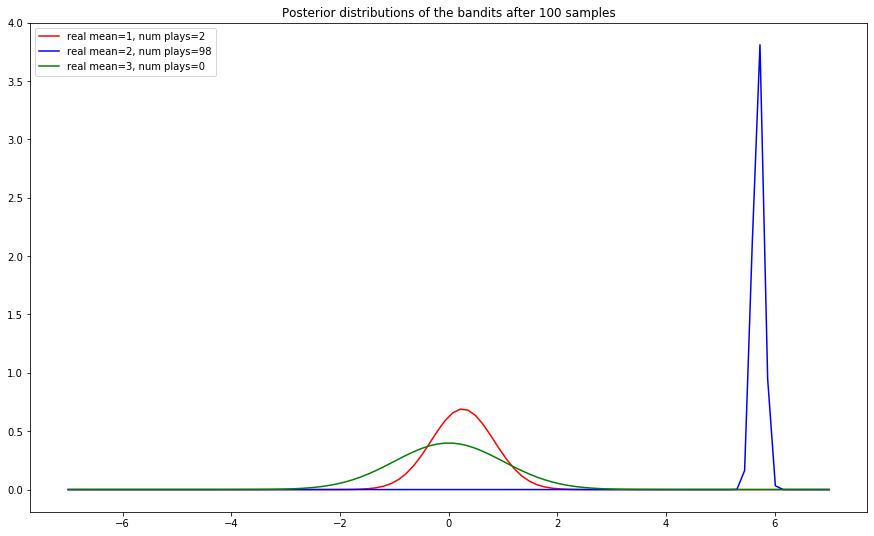

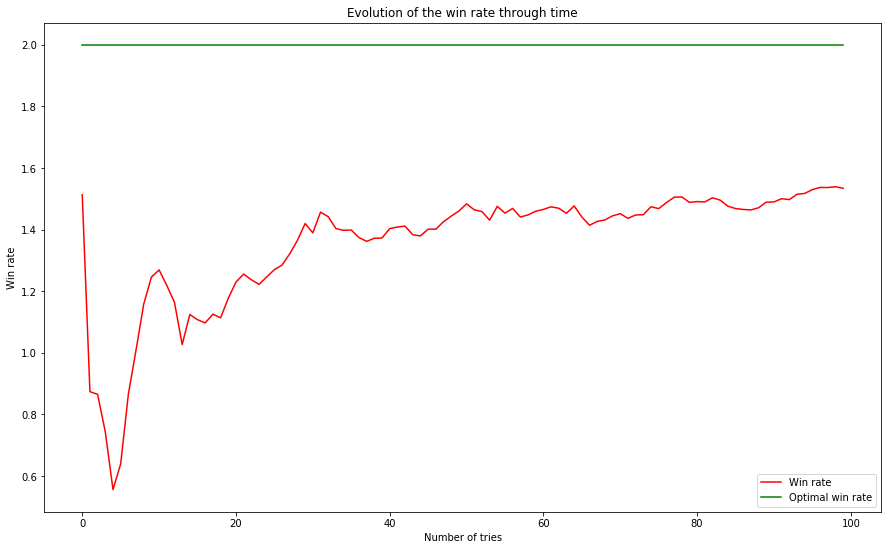

In [146]:
print("The total reward earned is "+str(total_reward))
print("Number of times each bandit was chosen : "+str(bandit_tries))
print("The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is "+str(100*num_optimal/N_tries)+"%")

win_rate=np.cumsum(reward_vector)/(np.arange(N_tries)+1)
optimal_win_rate=np.ones(N_tries)*max(bandit_mean)

x=np.linspace(-7,7,100) 
plt.figure(figsize=(15, 9))
plt.plot(x,norm.pdf(x,mean_[0],sqrt(1/lambda_[0])), 'r', label='real mean=1, num plays='+str(bandit_tries[0]))
plt.plot(x,norm.pdf(x,mean_[1],sqrt(1/lambda_[1])), 'b', label='real mean=2, num plays='+str(bandit_tries[1]))
plt.plot(x,norm.pdf(x,mean_[2],sqrt(1/lambda_[2])), 'g', label='real mean=3, num plays='+str(bandit_tries[2]))
plt.legend()
plt.title("Posterior distributions of the bandits after "+str(N_tries)+" samples")

plt.figure(figsize=(15, 9))
plt.plot(win_rate[:], 'r', lw=1.5, label='Win rate')
plt.plot(optimal_win_rate[:], 'g', lw=1.5, label='Optimal win rate')
plt.xlabel('Number of tries')
plt.ylabel('Win rate')
plt.legend()
plt.title("Evolution of the win rate through time")
plt.show()